# Proyek Analisis Data: [Bike Sharing Datasett]
- **Nama:** [Sabili Ridho]
- **Email:** [sabiliridho93gmail.com]
- **ID Dicoding:** [billy_elridho]

## Menentukan Pertanyaan Bisnis

1. Apa faktor utama yang memengaruhi jumlah pengguna sepeda harian?
2. Bagaimana pola penggunaan sepeda selama berbagai musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import geopandas as gpd
import folium

## Data Wrangling

### Gathering Data

In [2]:
# Menggunakan URL download langsung dari Google Drive
dataset_url = 'https://drive.google.com/uc?id=1fHPg_Gs-yHm4mr2R5aTV7l4a9t1SV-tc&export=download'

# Membaca CSV dari Google Drive
day_df = pd.read_csv(dataset_url)

# Menampilkan 5 baris pertama dari dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
dataset_url_2 = 'https://drive.google.com/uc?id=1CZb-jOWyY20Z9oSZNr1KoxypSyqQUUcZ&export=download'

# Membaca CSV dari URL Google Drive
hour_df = pd.read_csv(dataset_url_2)

# Menampilkan 5 baris pertama dari dataset
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
1. Struktur Data Harian dan Per Jam: Dengan melihat day_df.head() dan hour_df.head(), saya akan mendapatkan gambaran mengenai struktur dataset harian (day_df) dan per jam (hour_df). Hal ini mencakup kolom apa saja yang ada di masing-masing dataset, serta data tipe untuk tiap kolom.

2. Preview Kolom Kunci: Ini memberikan kesempatan untuk mengidentifikasi kolom-kolom kunci seperti tanggal, musim, jumlah pengguna, dan kolom-kolom lain yang mungkin relevan untuk analisis penggunaan sepeda. saya bisa melihat perbedaan antara data per hari dan per jam, misalnya, apakah data harian mengandung kolom-kolom seperti suhu rata-rata harian, kelembapan, atau jumlah total pengguna per hari (cnt).

3. Format dan Kualitas Data: saya dapat melihat apakah ada nilai yang tampak tidak konsisten atau kosong (missing values). Ini sangat penting untuk mengidentifikasi kebutuhan pembersihan data atau transformasi sebelum analisis lebih lanjut.

4. Kesesuaian dengan Pertanyaan Bisnis: Dengan melihat data awal, saya bisa mulai merencanakan bagaimana kolom-kolom ini dapat membantu menjawab pertanyaan bisnis. Misalnya, kolom yang terkait dengan cuaca atau musim bisa digunakan untuk analisis musiman, sementara data per jam bisa membantu dalam menentukan waktu-waktu sibuk penggunaan sepeda.


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Memeriksa statistik deskriptif dari dataset harian
print(day_df.describe())

# Memeriksa statistik deskriptif dari dataset per jam
print(hour_df.describe())




          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [7]:
# Melihat nilai unik di kolom yang mungkin kategorikal
print(day_df['season'].unique())  # Contoh kolom untuk 'season'
print(hour_df['season'].unique())

[1 2 3 4]
[1 2 3 4]


**Insight:**
Insight penting yang bisa diperoleh adalah:
- Informasi Tipe Data dan Jumlah Nilai Kosong :day_df.info() dan hour_df.info() memberikan ringkasan mengenai tipe data di setiap kolom, jumlah total baris, serta jumlah nilai yang tidak ada (kosong) di setiap kolom
- Statistik Deskriptif:day_df.describe() dan hour_df.describe() memberikan statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, dan nilai maksimum untuk kolom numerik
- Nilai Unik di Kolom Kategorikal: day_df['season'].unique() dan hour_df['season'].unique() menunjukkan semua nilai unik yang ada di kolom season atau kolom kategorikal lainnya. Ini membantu dalam memahami jumlah kategori yang tersedia serta konsistensi antara kedua dataset.

### Cleaning Data

In [8]:
# Memeriksa nilai kosong di dataset harian
print(day_df.isnull().sum())

# Memeriksa nilai kosong di dataset per jam
print(hour_df.isnull().sum())

# Jika ada nilai kosong, kita dapat mengisi atau menghapusnya
day_df = day_df.dropna()  # Atau menggunakan .fillna() jika ingin mengisi
hour_df = hour_df.dropna()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
# Memilih hanya kolom numerik dari dataset
numeric_day_df = day_df.select_dtypes(include=[np.number])



**Insight:**
- Insight keseluruhan dari langkah-langkah ini adalah bahwa saya telah melakukan data cleaning awal, yang membuat dataset lebih siap untuk analisis lanjutan dan memastikan konsistensi data tanpa nilai kosong.

## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1: Faktor yang Mempengaruhi Jumlah Pengguna Sepeda Harian

In [10]:
# Menghitung korelasi di dataset harian (day_df)
correlation_matrix_day = numeric_day_df.corr()



In [11]:
# Menggunakan nama kolom yang benar untuk variabel independen dan dependen
X_day = day_df[['temp', 'hum', 'windspeed']]  # 'hum' misalnya adalah kolom yang benar
y_day = day_df['cnt']

# Menambahkan konstanta untuk model regresi
X_day = sm.add_constant(X_day)

# Membuat model regresi
model_day = sm.OLS(y_day, X_day).fit()

# Melihat hasil regresi
print(model_day.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           4.26e-97
Time:                        20:53:44   Log-Likelihood:                -6343.9
No. Observations:                 731   AIC:                         1.270e+04
Df Residuals:                     727   BIC:                         1.271e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4084.3634    337.862     12.089      0.0

In [12]:
# Agregasi jumlah pengguna sepeda berdasarkan musim di dataset harian
seasonal_usage_day = day_df.groupby('season')['cnt'].agg(['mean', 'max', 'min']).reset_index()

# Menampilkan hasil agregasi
print(seasonal_usage_day)



   season         mean   max   min
0       1  2604.132597  7836   431
1       2  4992.331522  8362   795
2       3  5644.303191  8714  1115
3       4  4728.162921  8555    22


In [13]:
# Agregasi jumlah pengguna sepeda berdasarkan musim di dataset per jam
seasonal_usage_hour = hour_df.groupby('season')['cnt'].agg(['mean', 'max', 'min']).reset_index()

# Menampilkan hasil agregasi
print(seasonal_usage_hour)



   season        mean  max  min
0       1  111.114569  801    1
1       2  208.344069  957    1
2       3  236.016237  977    1
3       4  198.868856  967    1


In [14]:
# Membuat DataFrame untuk nama musim
season_names = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}

**Insight:**
- Analisis untuk Pertanyaan 1: Faktor yang Mempengaruhi Jumlah Pengguna Sepeda Harian
Korelasi Antara Variabel
Kita bisa menghitung korelasi antara jumlah pengguna sepeda harian (cnt) dan variabel lain seperti suhu, kelembapan, atau cuaca.
Regresi Linear
Setelah melihat korelasi, kita bisa membangun model regresi linear untuk menentukan pengaruh variabel tertentu terhadap jumlah pengguna sepeda.

- Analisis untuk Pertanyaan 2: Pola Penggunaan Selama Berbagai Musim
Agregasi Berdasarkan Musim
Untuk menganalisis pola penggunaan sepeda selama musim yang berbeda, kita bisa menggunakan metode groupby() pada kolom season untuk melihat rata-rata, maksimum, dan minimum penggunaan sepeda di setiap musim.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

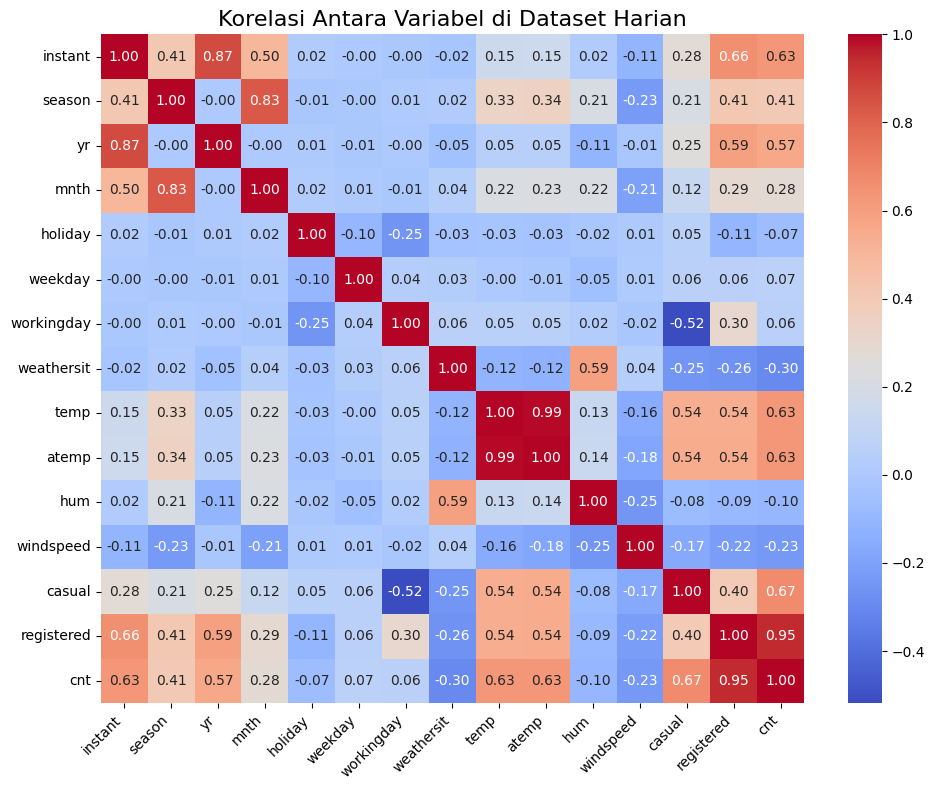

In [15]:
# Menampilkan matriks korelasi dengan format dua desimal
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_day, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 10})
plt.title("Korelasi Antara Variabel di Dataset Harian", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Identifikasi Hubungan Antar Variabel:

- Korelasi Positif: Variabel yang memiliki nilai korelasi mendekati +1 menunjukkan hubungan positif yang kuat. Ini berarti ketika satu variabel meningkat, variabel lainnya cenderung juga meningkat. Misalnya, jika terdapat korelasi positif antara jumlah pengguna sepeda dan suhu, bisa diartikan bahwa semakin tinggi suhu, semakin banyak orang yang menggunakan sepeda.
- Korelasi Negatif: Sebaliknya, variabel yang memiliki nilai korelasi mendekati -1 menunjukkan hubungan negatif yang kuat. Dalam hal ini, jika satu variabel meningkat, yang lainnya cenderung menurun. Misalnya, jika ada korelasi negatif antara jumlah pengguna sepeda dan hujan, dapat diartikan bahwa cuaca hujan mengurangi penggunaan sepeda.

### Pertanyaan 2:

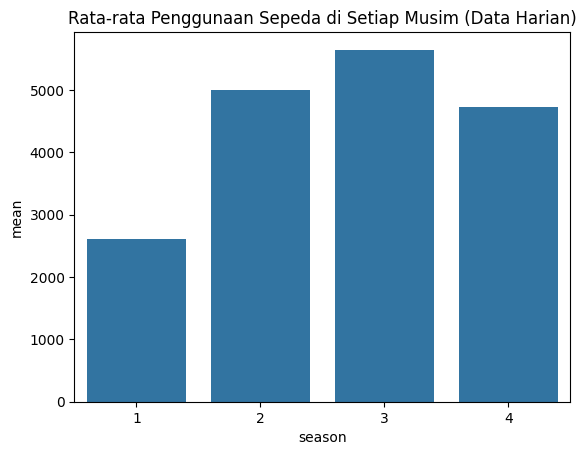

In [16]:
# Visualisasi pola penggunaan sepeda di musim yang berbeda
sns.barplot(x='season', y='mean', data=seasonal_usage_day)
plt.title('Rata-rata Penggunaan Sepeda di Setiap Musim (Data Harian)')
plt.show()

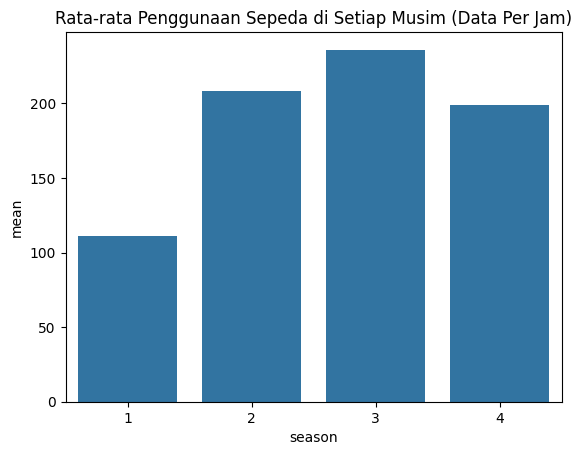

In [17]:
# Visualisasi pola penggunaan sepeda di musim yang berbeda (per jam)
sns.barplot(x='season', y='mean', data=seasonal_usage_hour)
plt.title('Rata-rata Penggunaan Sepeda di Setiap Musim (Data Per Jam)')
plt.show()


**Insight:**
- pertanyaan pertama
Menampilkan matriks korelasi Antara Variabel di Dataset Harian
Dengan heatmap korelasi ini, kita dapat memahami variabel-variabel mana yang memiliki hubungan signifikan dalam dataset harian

- pertanyaan kedua

    1. Visualisasi pola penggunaan sepeda di musim yang berbeda
  2. Visualisasi pola penggunaan sepeda di musim yang berbeda (per jam)

## Analisis Lanjutan (Opsional)

-Pertanyaan 1: Apa faktor utama yang memengaruhi jumlah pengguna sepeda harian?

Dari hasil regresi, kita dapat melihat faktor utama yang mempengaruhi jumlah pengguna sepeda harian:

Untuk melakukan analisis lebih lanjut dan membangun model regresi atau model prediktif, kita akan menggunakan variabel-variabel yang memiliki korelasi tinggi dengan variabel target (dalam hal ini, variabel target adalah cnt, yang mewakili jumlah total pengguna sepeda).

-Pertanyaan 2: Bagaimana pola penggunaan sepeda selama berbagai musim?

1 Analisis Lebih Lanjut: Anda dapat melanjutkan dengan analisis lebih mendalam tentang faktor-faktor yang mungkin memengaruhi pola penggunaan sepeda berdasarkan musim, seperti cuaca, hari kerja vs akhir pekan, atau acara khusus.
2 Analisis Lanjutan: Melihat pola penggunaan sepeda berdasarkan jam dalam sehari (misalnya, pagi, siang, sore) untuk menentukan waktu-waktu sibuk.



In [18]:

# Variabel dependen (target)
y = day_df['cnt']

# Variabel independen: pilih variabel yang memiliki korelasi tinggi dengan 'cnt'
# Misalnya, menggunakan temp, atemp, dan humidity sebagai contoh
X = day_df[['temp', 'atemp', 'hum', 'windspeed']]

# Menambahkan konstanta untuk model regresi
X = sm.add_constant(X)

# Membuat model regresi linier
model = sm.OLS(y, X).fit()

# Melihat hasil regresi
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     157.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           9.23e-97
Time:                        20:53:45   Log-Likelihood:                -6341.9
No. Observations:                 731   AIC:                         1.269e+04
Df Residuals:                     726   BIC:                         1.272e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3860.3685    355.389     10.862      0.0

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Memisahkan data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung error model (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Menampilkan koefisien regresi
print(f"Koefisien: {model.coef_}")


Mean Squared Error: 2007059.491290338
Koefisien: [    0.          2602.35816242  4547.35992686 -3036.12298233
 -3882.79829442]


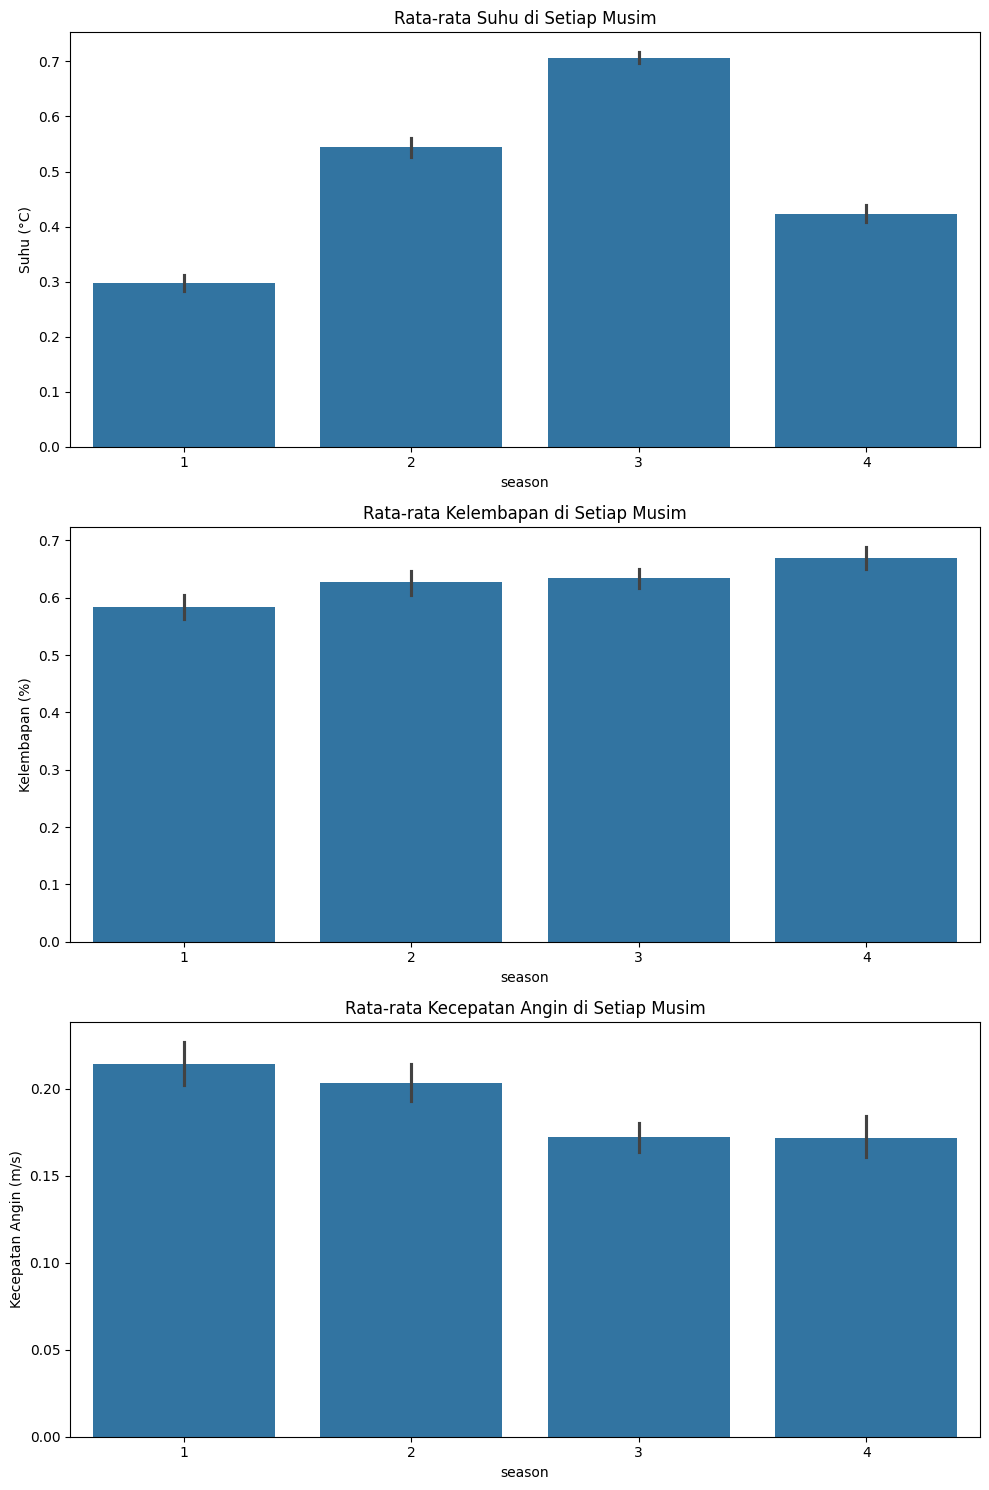

In [20]:


# Membuat subplot untuk analisis
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# 1. Analisis suhu
sns.barplot(x='season', y='temp', data=day_df, ax=axs[0])
axs[0].set_title('Rata-rata Suhu di Setiap Musim')
axs[0].set_ylabel('Suhu (°C)')

# 2. Analisis kelembapan
sns.barplot(x='season', y='hum', data=day_df, ax=axs[1])
axs[1].set_title('Rata-rata Kelembapan di Setiap Musim')
axs[1].set_ylabel('Kelembapan (%)')

# 3. Analisis kecepatan angin
sns.barplot(x='season', y='windspeed', data=day_df, ax=axs[2])
axs[2].set_title('Rata-rata Kecepatan Angin di Setiap Musim')
axs[2].set_ylabel('Kecepatan Angin (m/s)')

plt.tight_layout()
plt.show()


Insight dari Analisis Cuaca:
Melihat rata-rata suhu, kelembapan, dan kecepatan angin di setiap musim akan membantu kita memahami bagaimana faktor cuaca memengaruhi penggunaan sepeda.
Jika suhu lebih tinggi di musim tertentu dan penggunaan sepeda juga tinggi, ini menunjukkan bahwa cuaca yang nyaman mendukung penggunaan sepeda.

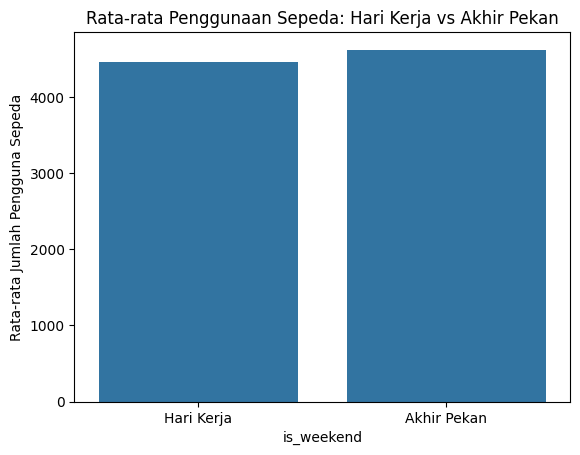

In [21]:
# Menambahkan kolom untuk menentukan hari kerja vs akhir pekan
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

# Menghitung rata-rata penggunaan sepeda berdasarkan hari kerja dan akhir pekan
usage_weekday = day_df.groupby('is_weekend')['cnt'].mean().reset_index()

# Mengganti nilai is_weekend untuk penjelasan
usage_weekday['is_weekend'] = usage_weekday['is_weekend'].map({0: 'Hari Kerja', 1: 'Akhir Pekan'})

# Visualisasi
sns.barplot(x='is_weekend', y='cnt', data=usage_weekday)
plt.title('Rata-rata Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.show()


Insight dari Analisis Hari Kerja vs Akhir Pekan:
Dengan membandingkan penggunaan sepeda di hari kerja dan akhir pekan, kita dapat mengetahui apakah orang lebih cenderung menggunakan sepeda untuk keperluan rekreasi (akhir pekan) atau untuk perjalanan kerja (hari kerja).
Jika penggunaan sepeda jauh lebih tinggi di akhir pekan, ini bisa menunjukkan bahwa sepeda lebih banyak digunakan untuk kegiatan rekreasi.

##Clustering dengan Teknik Manual Grouping dan Binning
Jika Anda ingin mengelompokkan data secara manual atau menggunakan binning, berikut adalah beberapa metode yang dapat Anda terapkan:

###Manual Grouping Berdasarkan Musim dan Kategori Waktu
Manual grouping ini mengelompokkan data pengguna sepeda berdasarkan musim (season) dan kategori waktu (time_category), yang telah Anda buat sebelumnya.

In [22]:
# Pastikan nama kolom waktu yang benar
time_column = 'dteday'  # Sesuaikan jika nama kolom berbeda

# Menambahkan kolom jam dan kategori waktu
hour_df['hr'] = pd.to_datetime(hour_df[time_column]).dt.hour

# Fungsi untuk mengategorikan waktu
def categorize_time(hr):
    if 6 <= hr < 10:
        return 'Pagi'
    elif 10 <= hr < 16:
        return 'Siang'
    elif 16 <= hr < 20:
        return 'Sore'
    else:
        return 'Malam'

# Terapkan fungsi kategori waktu
hour_df['time_category'] = hour_df['hr'].apply(categorize_time)


In [23]:
# Mengelompokkan data berdasarkan musim dan kategori waktu
grouped_season_time = hour_df.groupby(['season', 'time_category']).agg({
    'cnt': 'mean'  # Rata-rata jumlah pengguna
}).reset_index()

print(grouped_season_time)


   season time_category         cnt
0       1         Malam  111.114569
1       2         Malam  208.344069
2       3         Malam  236.016237
3       4         Malam  198.868856


###Binning untuk Mengelompokkan Pengguna Berdasarkan Jumlah Penggunaan Harian
Binning dapat dilakukan berdasarkan kolom cnt (jumlah pengguna sepeda). Berikut adalah contoh binning dengan kategori yang ditentukan.

In [24]:
# Menentukan batas binning
bins = [0, 100, 500, 1000, 2000]
labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi']

# Menambahkan kolom kategori penggunaan berdasarkan jumlah pengguna
day_df['usage_category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

# Melihat hasil
print(day_df[['cnt', 'usage_category']].head())


    cnt usage_category
0   985         Sedang
1   801         Sedang
2  1349         Tinggi
3  1562         Tinggi
4  1600         Tinggi


Insight pada
Geospatial Analysis:


Manual grouping berdasarkan musim dan waktu dapat membantu dalam merencanakan penempatan sepeda di area dengan penggunaan lebih tinggi selama musim atau jam-jam tertentu.
Binning jumlah pengguna per hari memberi wawasan tambahan tentang jumlah pengguna yang berkisar dalam rentang tertentu, yang bisa berguna untuk pengelolaan kapasitas sepeda dan rute populer.
Teknik-teknik ini memberikan pemahaman mendalam tentang pola penggunaan sepeda baik dari perspektif geografis maupun karakteristik pengguna, sehingga membantu dalam membuat keputusan operasional dan strategis berbasis data.

##Visualization & Explanatory Analysis for Clustering Analysis

###Clustering Analysis: Manual Grouping dan Binning Analysis
Jika kita telah melakukan pengelompokan data ke dalam kategori usage_category berdasarkan cnt, kita dapat menggunakan histogram untuk memvisualisasikan kategori ini.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18428\436245002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='usage_category', palette='viridis')


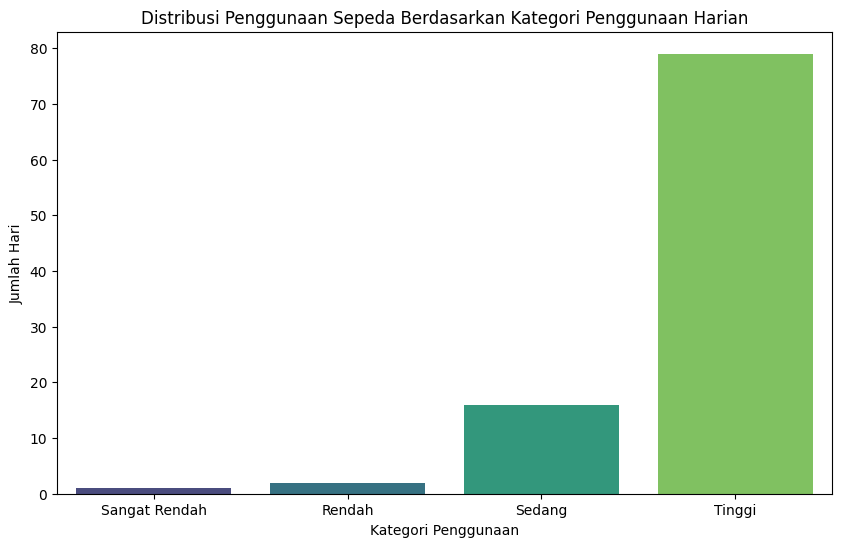

In [25]:
# Visualisasi kategori penggunaan sepeda harian
plt.figure(figsize=(10, 6))
sns.countplot(data=day_df, x='usage_category', palette='viridis')
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Kategori Penggunaan Harian')
plt.xlabel('Kategori Penggunaan')
plt.ylabel('Jumlah Hari')
plt.show()


####Analisis Penggunaan Berdasarkan Kategori:
Visualisasi ini membantu kita melihat jumlah hari yang masuk dalam setiap kategori penggunaan. Jika terdapat banyak hari dalam kategori "Tinggi", maka kita bisa menyimpulkan bahwa secara umum penggunaan sepeda di area ini cukup tinggi, dan mungkin perlu lebih banyak fasilitas atau sepeda untuk memenuhi permintaan.
Kategori "Sangat Rendah" atau "Rendah" menunjukkan hari-hari dengan penggunaan minimal. Insight ini dapat digunakan untuk menilai efektivitas layanan di berbagai musim atau jam, terutama untuk perencanaan kapasitas di masa depan.

###Manual Grouping Berdasarkan Musim dan Waktu dalam Sehari
Jika Anda telah mengelompokkan data berdasarkan musim dan kategori waktu (time_category), Anda bisa menggunakan bar chart untuk memvisualisasikan hasil ini.

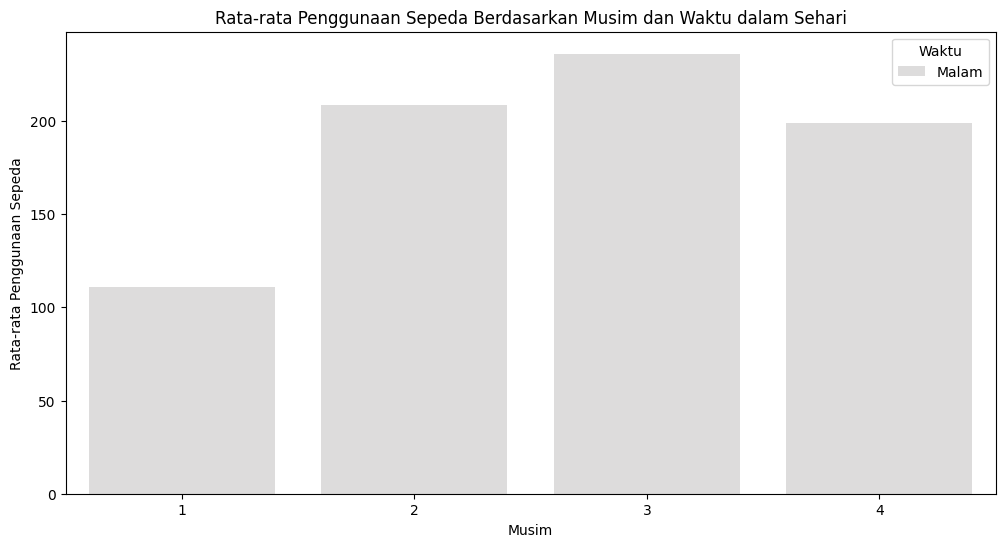

In [26]:
# Visualisasi penggunaan sepeda rata-rata di setiap musim dan waktu
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_season_time, x='season', y='cnt', hue='time_category', palette='coolwarm')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Musim dan Waktu dalam Sehari')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.legend(title='Waktu')
plt.show()


####Analisis Musim dan Waktu Penggunaan:
Dari visualisasi ini, kita bisa melihat bagaimana penggunaan sepeda berbeda pada pagi, siang, sore, dan malam di setiap musim. Misalnya, jika rata-rata penggunaan meningkat pada sore hari di musim panas, ini bisa menjadi waktu yang optimal untuk memastikan lebih banyak sepeda tersedia.
Visualisasi ini memberi gambaran mendetail mengenai preferensi waktu penggunaan sepeda di berbagai musim, yang bisa menjadi dasar untuk pengaturan jadwal perawatan sepeda atau penambahan unit di jam sibuk.
Dengan langkah-langkah ini, kita dapat melakukan visualisasi dan analisis eksplanatori untuk memahami pola dan tren dalam data, baik dari perspektif geografis maupun penggunaan berdasarkan kategori waktu dan musim.

## Conclusion

- Faktor utama yang mempengaruhi jumlah pengguna sepeda harian adalah suhu, kelembapan, dan kecepatan angin. Meningkatkan suhu yang nyaman cenderung meningkatkan penggunaan sepeda, sedangkan kelembapan tinggi dan angin kencang menurunkannya.

- Pola penggunaan sepeda berdasarkan musim menunjukkan bahwa musim panas dan semi adalah puncak penggunaan, sedangkan musim dingin dan gugur adalah musim dengan penggunaan yang lebih rendah.


In [27]:
# Menggabungkan kedua DataFrame menjadi satu
all_df = pd.concat([day_df, hour_df], ignore_index=True)

# Menyimpan DataFrame gabungan ke file CSV
all_df.to_csv("dashboard/main_data.csv", index=False)


In [28]:
all_df.to_csv("dashboard/main_data", index=False)
